In [1]:
# install pipenv requirements
!pipenv install
import dotenv
import os
from wifi_experiment.utlis import *

# load environment variables
dotenv.load_dotenv()
SSH_USERNAME = os.getenv("SSH_USERNAME")
SSH_HOST = os.getenv("SSH_HOST")
SSH_PORT = os.getenv("SSH_PORT")
SSH_PASSWORD = os.getenv("SSH_PASSWORD")
NS3DIR = os.getenv("NS3DIR")

# connect to remote host
host = remote_host(host=SSH_HOST, port=SSH_PORT, username=SSH_USERNAME, password=SSH_PASSWORD, ns3dir=NS3DIR, timeout=hours_to_seconds(2)) # this might usually be a bad idea, but the simulation runs a long time, so the timeout is set to a ridiculous value

Loading .env environment variables...
Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing dependencies from Pipfile.lock (d17b6c)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [2]:
# setup example experiment
propModel = propagationModels[0]
run = experiment_run(host=host, propModel=propModel, simulationTime_s=10, distance_m=10, remote_csv_path=f"{host.ns3dir}/output/test_dr", local_csv_path="output/test_dr", export_rx_dr=True, export_summary=True, export_rx_pwr=True, remote_file_cleanup=False)
# run.run()

In [3]:
output = run.run()
print(output)

Scanning dependencies of target stdlib_pch-default
Scanning dependencies of target stdlib_pch_exec
[  0%] Building CXX object CMakeFiles/stdlib_pch-default.dir/cmake_pch.hxx.gch
[  1%] Building CXX object CMakeFiles/stdlib_pch_exec.dir/cmake_pch.hxx.gch
[  1%] Building CXX object CMakeFiles/stdlib_pch-default.dir/build-support/empty.cc.o
[  1%] Building CXX object CMakeFiles/stdlib_pch_exec.dir/build-support/empty-main.cc.o
Scanning dependencies of target libbridge-obj
Scanning dependencies of target libantenna-obj
[  1%] Building CXX object src/bridge/CMakeFiles/libbridge-obj.dir/helper/bridge-helper.cc.o
[  1%] Linking CXX executable ns3.39-stdlib_pch_exec-default
[  1%] Building CXX object src/antenna/CMakeFiles/libantenna-obj.dir/model/angles.cc.o
Scanning dependencies of target libpropagation-obj
Scanning dependencies of target libmobility-obj
Scanning dependencies of target libstats-obj
Scanning dependencies of target libenergy-obj
Scanning dependencies of target libaodv-obj
Scan

In [4]:
run.get_output_files()

import pandas as pd
dr_df = pd.read_csv(run.local_rx_dr_csv_path)
# dr_df.describe()

# drop spikes from the data
dr_df_clean = dr_df[dr_df["DataRate_Mbps"] < 1000]
dr_df_clean = dr_df_clean[dr_df_clean["DataRate_Mbps"] > 0]
dr_df_clean.describe()

,Time,DataRate_Mbps
count,18853.000000,18853.000000
mean,5.567364,25.232265
std,2.563556,4.274825
min,1.008120,0.011507
25%,3.350000,22.876700
50%,5.577580,25.104600
75%,7.786860,27.225800
max,9.999590,63.736300


In [5]:

pwr_df = pd.read_csv(run.local_rx_pwr_csv_path)
pwr_df.describe()


,Time,RxPower
count,18854.000000,18854.000000
mean,5.567280,-54.712687
std,2.563703,0.000395
min,1.008010,-54.712700
25%,3.349820,-54.712700
50%,5.577520,-54.712700
75%,7.786948,-54.712700
max,9.999740,-54.698800


In [6]:
summary_df = pd.read_csv(run.local_summary_csv_path)

summary_df.head()

,FlowId,SourceAddress,DestinationAddress,ReceivedDataRate,AverageRxPower
0,1,10.1.1.1,10.1.1.2,68.74,-54.71


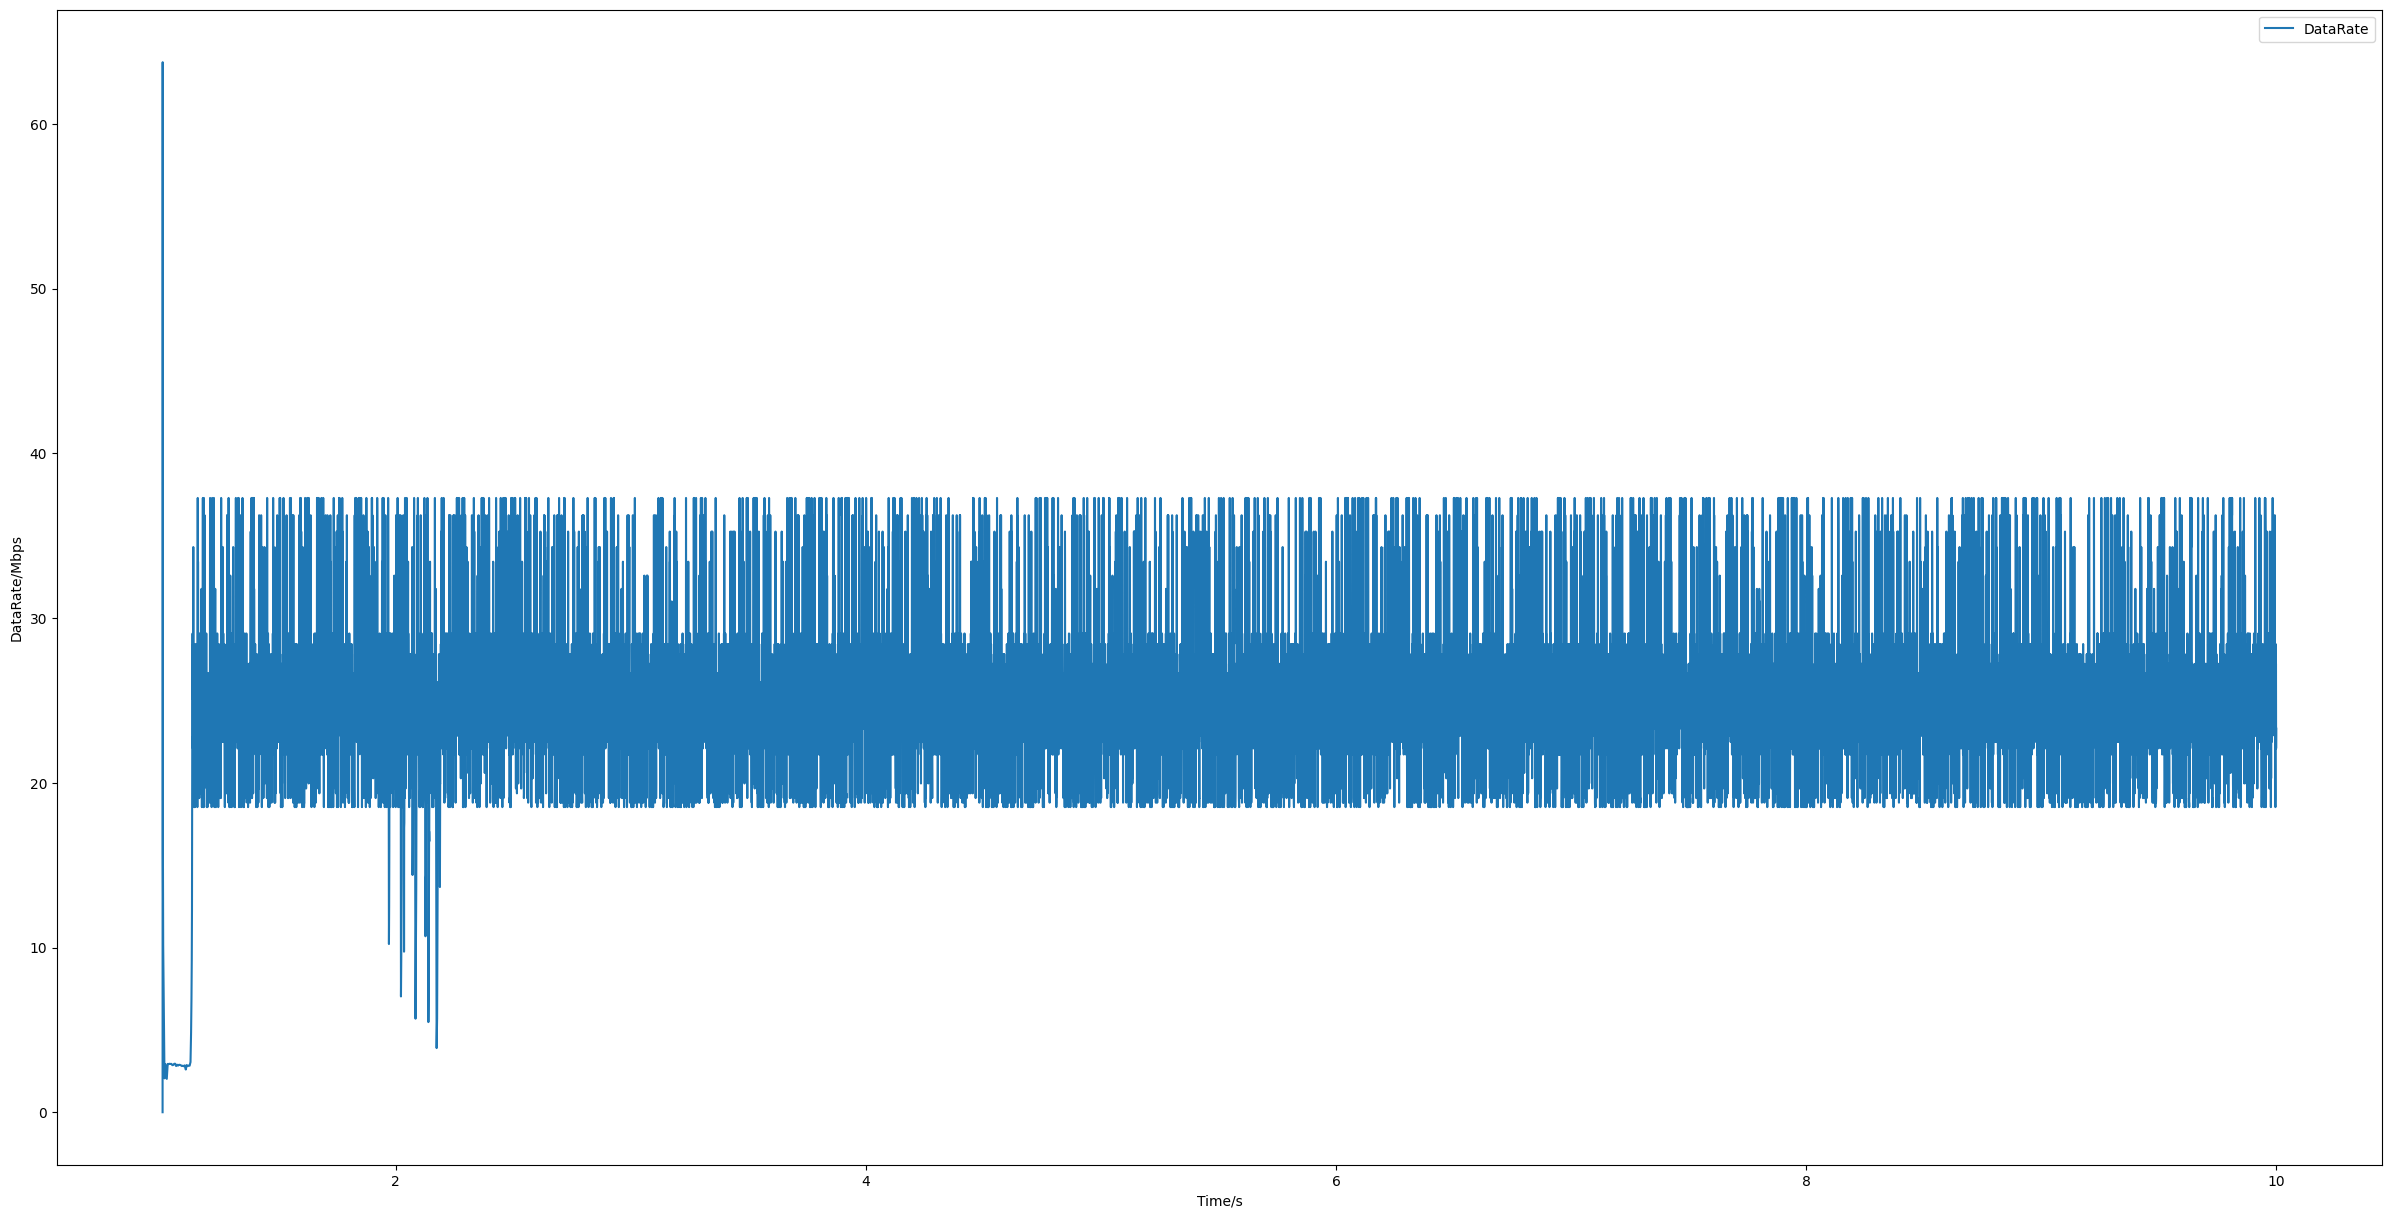

In [7]:
# plot datarate against time
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))  # Set the width to 30 centimeters and height to 15 centimeters
plt.plot(dr_df_clean["Time"], dr_df_clean["DataRate_Mbps"], label="DataRate")
# label the axes
plt.xlabel("Time/s")
plt.ylabel("DataRate/Mbps")
plt.legend()
plt.show()


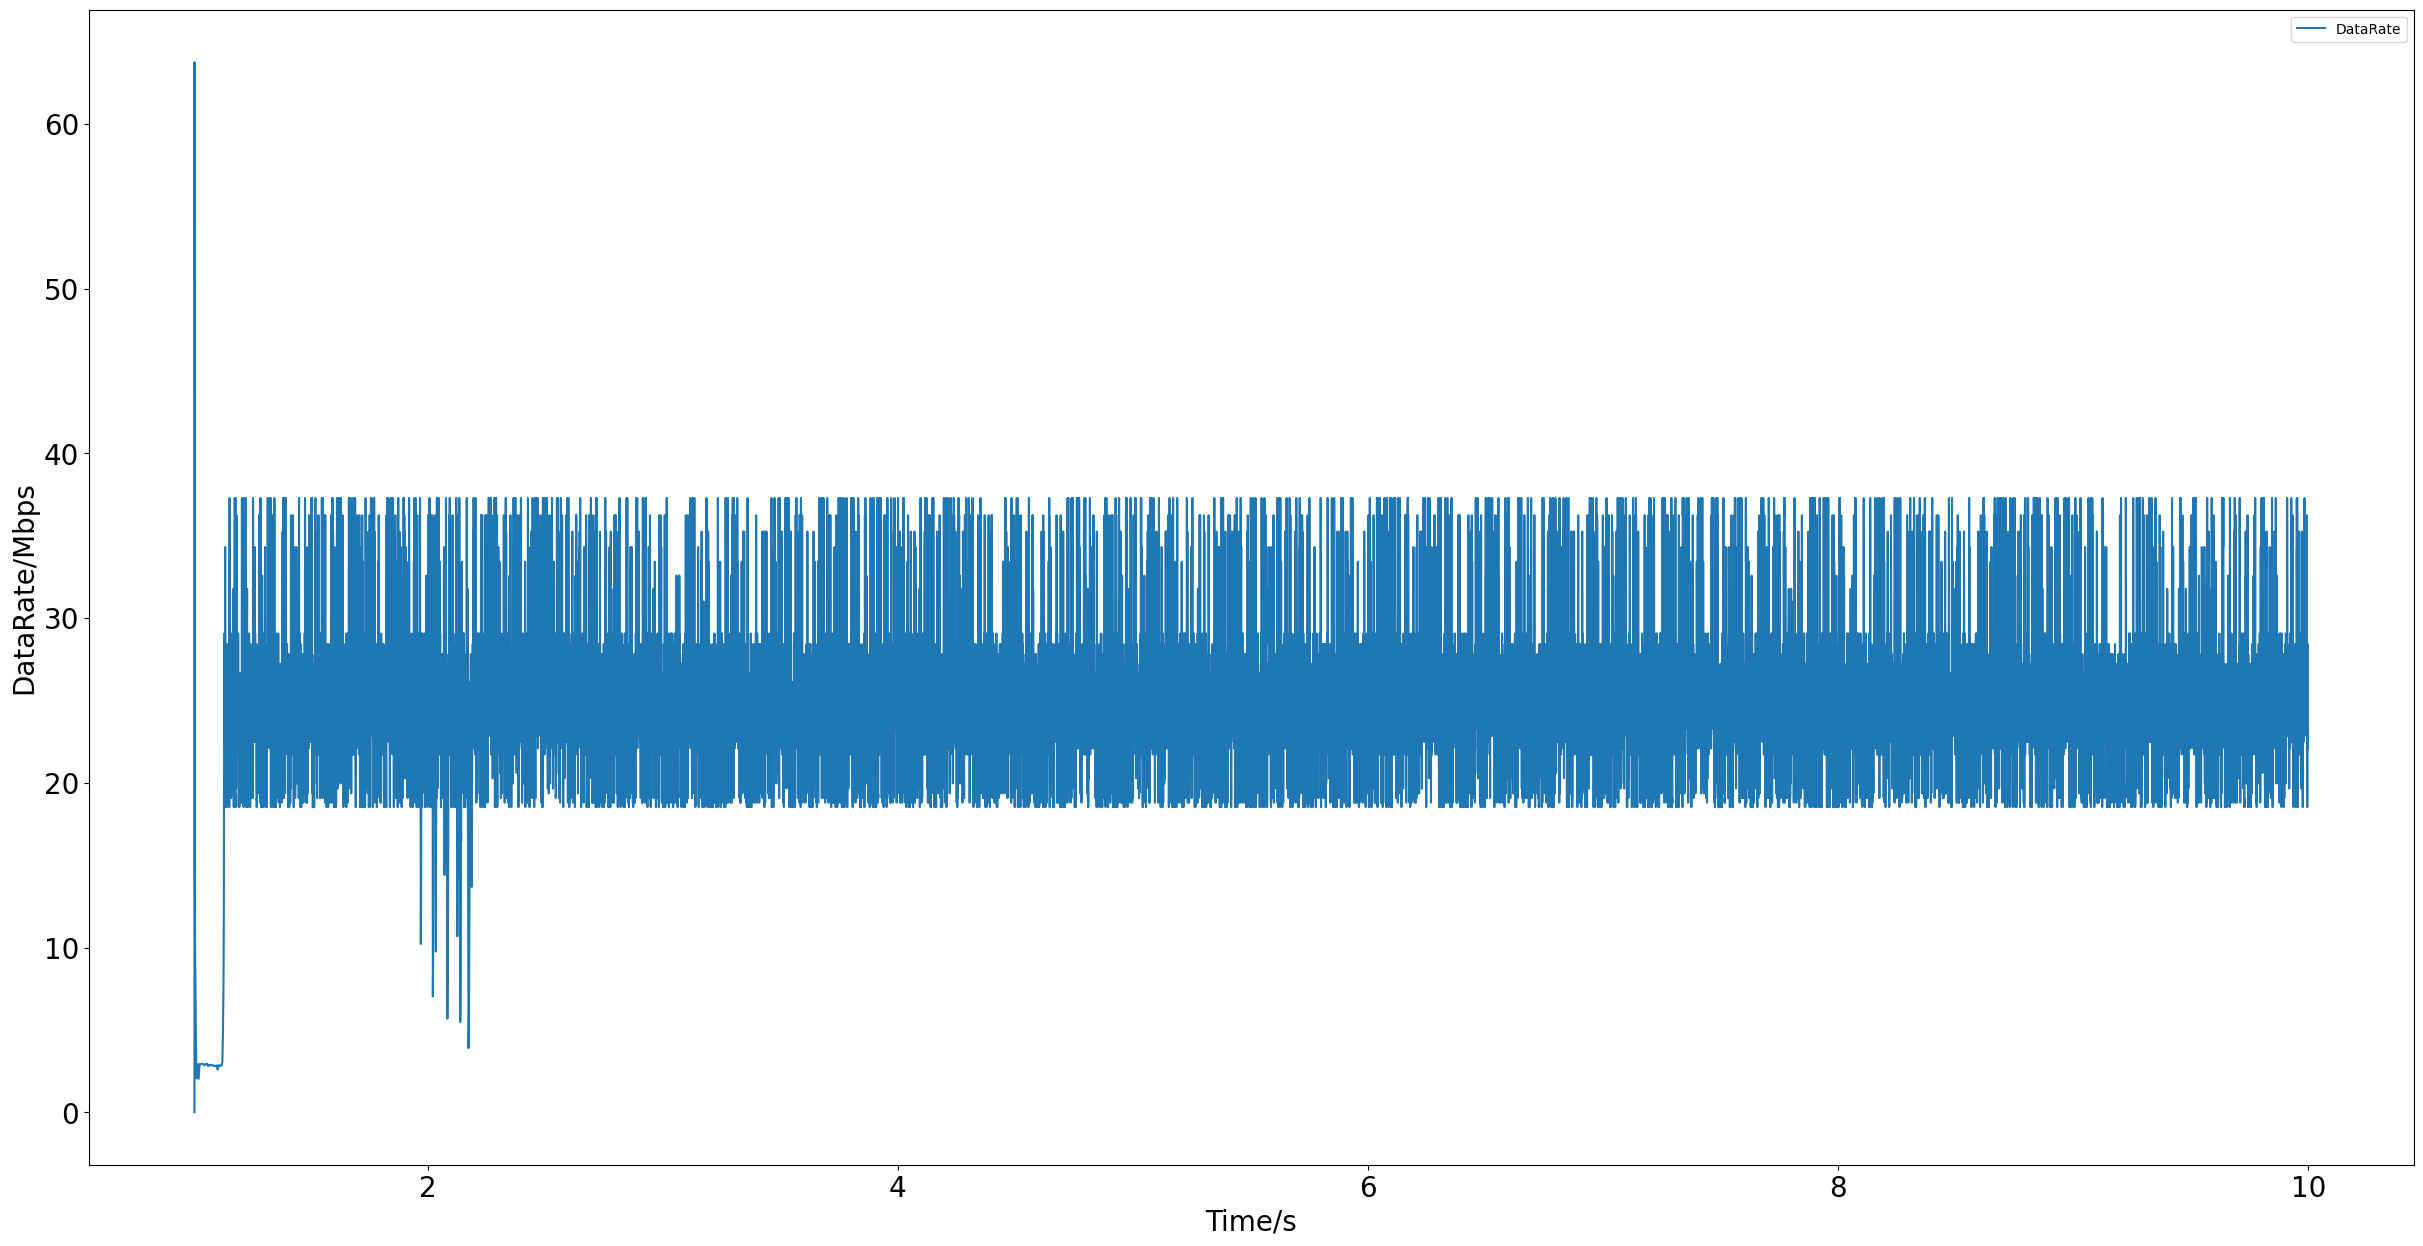

Socket exception: Connection reset by peer (104)


In [11]:
# plot datarate against time
import matplotlib.pyplot as plt

fontsize = 20

plt.figure(figsize=(30, 15))  # Set the width to 30 centimeters and height to 15 centimeters
plt.plot(dr_df["Time"], dr_df["DataRate_Mbps"], label="DataRate")
# label the axes with larger font size
plt.xlabel("Time/s", fontsize=fontsize)
plt.ylabel("DataRate/Mbps", fontsize=fontsize)
plt.xticks(fontsize=fontsize)  # make x-axis tick labels bigger
plt.yticks(fontsize=fontsize)  # make y-axis tick labels bigger
plt.legend()
plt.show()


In [1]:
import dotenv
import os
from wifi_experiment.utlis import *
runs = run_experiments_until_no_dr(simulationTime_s=10, step_size_m=1, timeout_seconds=120, output_folder="output2")

---Initializing ns3---
Cleaning ns3
Configuring ns3
Building ns3
---Done---
---Running experiments until no dr---
---Running experiment with FixedRssLossModel at 1.0m---
                                               ===starting wifi-experiment.cc===
Flow 1 (10.1.1.1 -> 10.1.1.2)
  Received data-rate: 68.74 Mbps
Average Rx power: -38.03 dBm

---Done---
---Running experiment with FixedRssLossModel at 2.0m---
                                               ===starting wifi-experiment.cc===
Flow 1 (10.1.1.1 -> 10.1.1.2)
  Received data-rate: 68.74 Mbps
Average Rx power: -38.03 dBm

---Done---
---Running experiment with FixedRssLossModel at 3.0m---
                                               ===starting wifi-experiment.cc===
Flow 1 (10.1.1.1 -> 10.1.1.2)
  Received data-rate: 68.74 Mbps
Average Rx power: -38.03 dBm

---Done---
---Running experiment with FixedRssLossModel at 4.0m---
                                               ===starting wifi-experiment.cc===
Flow 1 (10.1.1.1 -> 10.1.1

In [2]:
from wifi_experiment import *
runs = restore_runs()

In [6]:
import pandas as pd

# dr_df_list = []
# pwr_df_list = []
summary_df_list = []
for run in runs[0:]:
    # dr_df_list.append(pd.read_csv(run.local_rx_dr_csv_path))
    # pwr_df_list.append(pd.read_csv(run.local_rx_pwr_csv_path))
    run_df = pd.read_csv(run.local_summary_csv_path)
    run_df["Distance_m"] = run.distance_m
    run_df["PropagationModel"] = run.propModel
    summary_df_list.append(run_df)

# dr_df = pd.concat(dr_df_list)
# pwr_df = pd.concat(pwr_df_list)
summary_df = pd.concat(summary_df_list)

# dr_df.describe() 
summary_df.describe() 

,FlowId,ReceivedDataRate,AverageRxPower,Distance_m
count,2748.0,2748.000000,2748.00000,2748.000000
mean,1.0,49.067500,-14.08964,787.487991
std,0.0,29.300306,35.00233,643.356159
min,1.0,0.010000,-81.98000,1.000000
25%,1.0,0.010000,-52.09500,172.000000
50%,1.0,68.740000,6.38000,665.500000
75%,1.0,68.800000,6.42000,1352.250000
max,1.0,68.800000,6.43000,2039.000000


In [7]:
summary_df.head()

,FlowId,SourceAddress,DestinationAddress,ReceivedDataRate,AverageRxPower,Distance_m,PropagationModel
0,1,10.1.1.1,10.1.1.2,68.74,-34.71,1.0,FriisPropagationLossModel
0,1,10.1.1.1,10.1.1.2,68.74,-40.73,2.0,FriisPropagationLossModel
0,1,10.1.1.1,10.1.1.2,68.74,-44.26,3.0,FriisPropagationLossModel
0,1,10.1.1.1,10.1.1.2,68.74,-46.75,4.0,FriisPropagationLossModel
0,1,10.1.1.1,10.1.1.2,68.74,-48.69,5.0,FriisPropagationLossModel


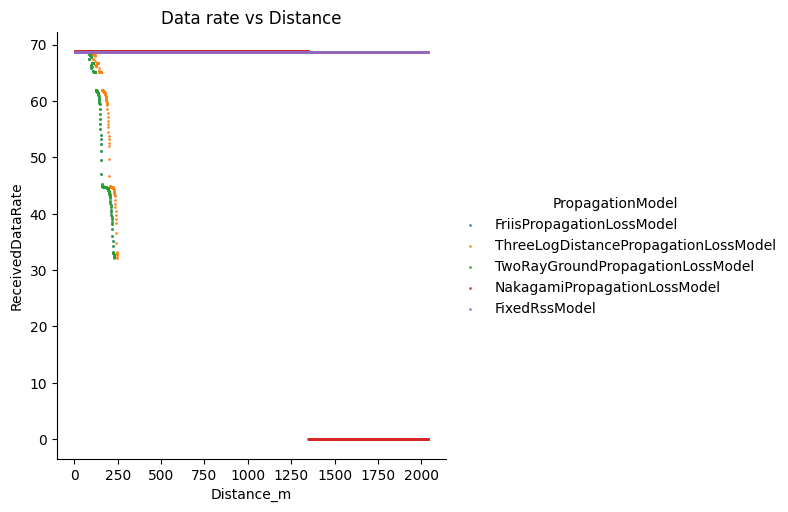

In [45]:
summary_fixed_rss_df = pd.read_csv(runs[0].local_summary_csv_path) # first run is with fixed rss model


# Get unique distances from filtered_df
distances = summary_df['Distance_m'].unique()

# Repeat the single entry in summary_fixed_rss_df for each unique distance
repeated_df = pd.DataFrame({
    'Distance_m': distances,
    'ReceivedDataRate': summary_fixed_rss_df['ReceivedDataRate'].values[0],
    'PropagationModel': 'FixedRssModel'
})

# Append repeated_df to filtered_df
combined_df = pd.concat([summary_df, repeated_df])

sns.lmplot(x='Distance_m', y='ReceivedDataRate', hue='PropagationModel', data=combined_df, fit_reg=False, scatter_kws={"s": 1})

plt.title('Data rate vs Distance')
plt.show()

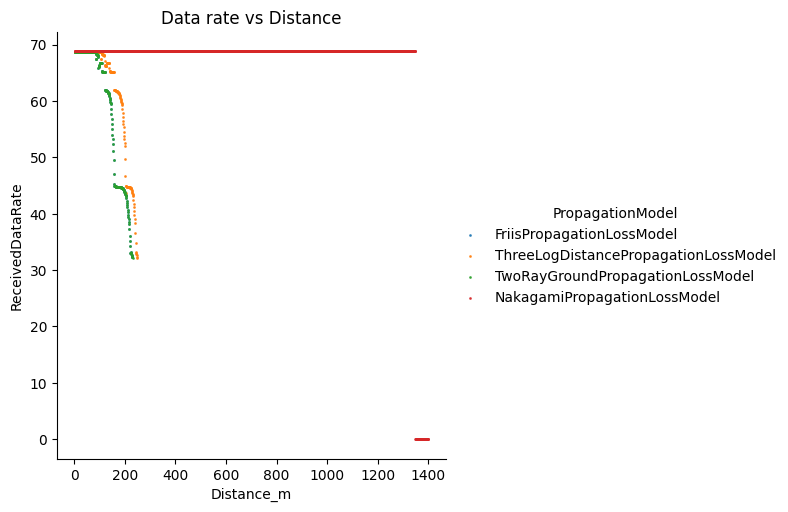

In [42]:
# plot datarate against distance
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame
filtered_df = summary_df[summary_df['Distance_m'] < 1400]
# filtered_df = filtered_df[filtered_df['PropagationModel'] != "TwoRayGround"]

# sns.lmplot(x='Distance_m', y='ReceivedDataRate', hue='PropagationModel', data=filtered_df, fit_reg=False, scatter_kws={"s": 1},height=10, aspect=3)
sns.lmplot(x='Distance_m', y='ReceivedDataRate', hue='PropagationModel', data=filtered_df, fit_reg=False, scatter_kws={"s": 1})

plt.title('Data rate vs Distance')
plt.show()

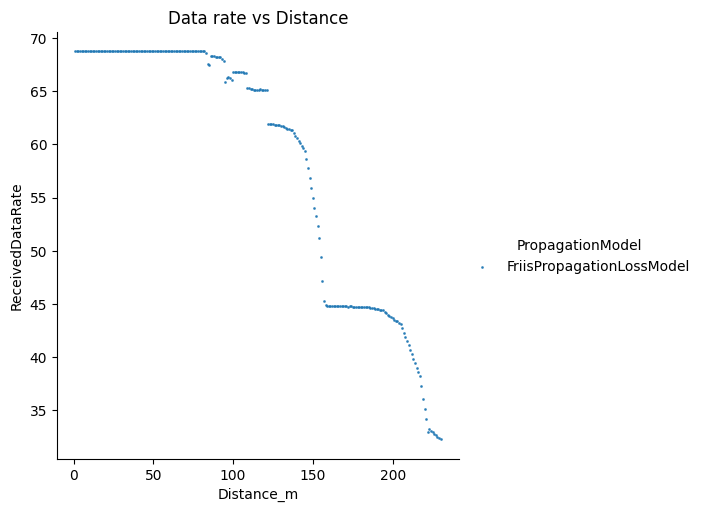

In [28]:
# plot datarate against distance
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame
filtered_df = summary_df[summary_df['PropagationModel'] =="FriisPropagationLossModel" ]


sns.lmplot(x='Distance_m', y='ReceivedDataRate', hue='PropagationModel', data=filtered_df, fit_reg=False, scatter_kws={"s": 1})

plt.title('Data rate vs Distance')
plt.show()

<Axes: xlabel='Time'>

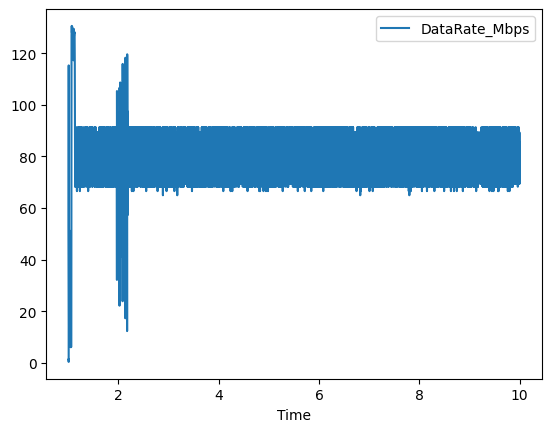

In [4]:
import pandas as pd
test_dr_df = pd.read_csv("dr.csv")
test_dr_df.plot(x="Time", y="DataRate_Mbps")
